In [1]:
from tinydb import Query, TinyDB
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Arial Unicode MS')

In [2]:
league = "city"  # gym, city
date_start = "2024.04.01"  # include
date_end = "2024.04.07"  # include

db_file = f"../db/{league}_deck_db.json"
DB = TinyDB(db_file, indent=4, ensure_ascii=False)
query = Query()

In [3]:
# Query by date range
documents = DB.search(
    (query.date >= date_start) &
    (query.date <= date_end))

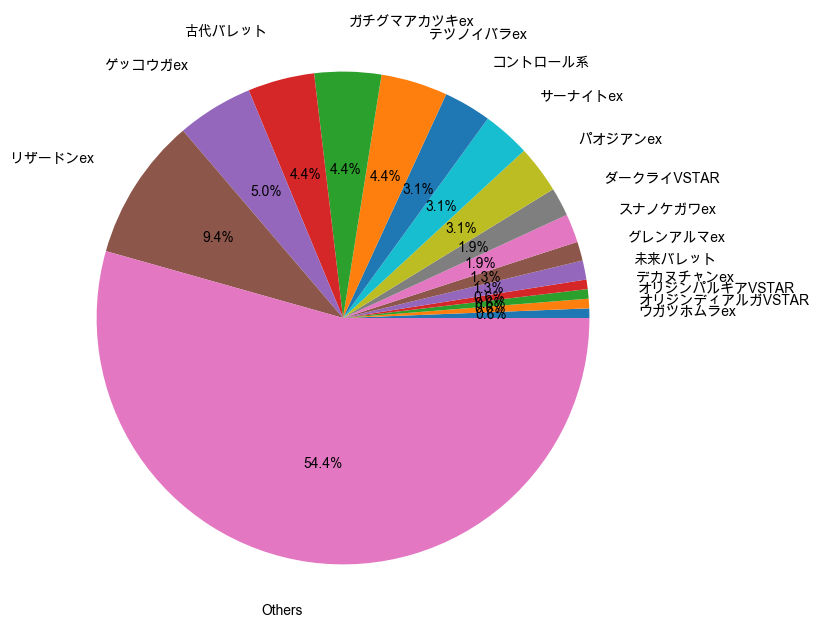

In [8]:
# Draw pie chart

# Collect data from queried documents
category_list = []
for doc in documents:
    category_list.append(doc['category'])
category_cont = Counter(category_list)

counts = []
labels = []
for categ, num in sorted(category_cont.items(), key=lambda x: x[1]):
    counts.append(num)
    labels.append(categ)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: specifies the figure size
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=0, labeldistance=1.2)

# Show the plot
plt.show()
